##Scrapping Google Apps Review - Rosalia Indah Transport
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [ ]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
!pip install scikit-learn
!pip install requests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 20.6 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 22.2 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 20.7 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ----- ---------------------------------- 5.0/38.5 MB 26.1 MB/s eta 0:00:02
   ---------- ----------------------------- 10.5/38.5 MB 25.7 MB/s eta 0:00:02
   ---------------- ----------------------- 16.0/38.5 MB 25.8 MB/s eta 0:00:01
   ---------------------- ----------------- 21.5/38.5 MB 26.0 MB/s eta 0:00:01
   ---

In [6]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [7]:
#Android App Rosalia Indah Transport  from Google Play at
#https://play.google.com/store/apps/details?id=com.rosalia.indah
#The apps ID found in the link after id=com.rosalia.indah
#The apps name on Google Play titled: Rosalia Indah Transport
#Dated 2 September 2025 and N of reviews 9.53K

from google_play_scraper import app, Sort, reviews_all

jkn_reviews = reviews_all(
    'com.rosalia.indah',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # set to 'id'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [8]:
#Save Rosalia Indah Transport reviews into dataframe
df_rosaliarev = pd.DataFrame(np.array(jkn_reviews),columns=['content'])
df_rosaliarev = df_rosaliarev.join(pd.DataFrame(df_rosaliarev.pop('content').tolist()))
df_rosaliarev.to_csv(r'df_rosaliarev', index=False)

## Homework TUGAS 1A

NLP Pipeline:
RAW data (save to csv) lakukan:

* Tokenization
* Lowering
* Stopword Removal
* Lemmatization
* Stemming
* Punctuations Removal
* Expand Contractions
* Spelling Correction
* Rare Words Removal
* Common Words Removal

(save as cleandata.csv)
* Frequent words (n=50,100,1000)
* Frequent Words found (new), contoh: yg, bs, tyt
* ditambahkan di stopwords removal
* Stopwords removal (NLTK, misal case study review hanya dalam Indonesia n=758)


In [9]:
df_rosaliarev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5ca3a48c-89ea-481b-a200-44c3178cd518,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bersama ROSALIA INDAH NYAMAN AMAN dijalan,5,0,2.16.0,2025-09-03 06:12:45,None,None,2.16.0
1,bc3d93ae-df3e-4ae4-b34f-f65329870e9f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setelah update malah ga bisa dibuka semua agen...,1,0,2.16.0,2025-09-02 10:47:22,None,None,2.16.0
2,919734d1-e477-480d-b34d-448ec50a4806,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyak bug,1,0,2.16.0,2025-09-01 19:43:55,None,None,2.16.0
3,86a002d7-6a9d-492f-8d9d-d48db206fb58,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi kok eror gak di cek dlu kalo upload,2,0,2.16.0,2025-09-01 09:54:03,None,None,2.16.0
4,31f8a439-5b4b-4409-8762-cd874dac6b26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bintang 4 karna belum bisa cetak e ticket dari...,4,0,2.16.0,2025-08-31 21:31:34,None,None,2.16.0
...,...,...,...,...,...,...,...,...,...,...,...
3905,617b973a-7f55-41b5-ba3f-328ca91f7f93,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Semakin mantab Perbisan di indonesia,5,5,1.0.0,2017-10-31 19:34:15,None,None,1.0.0
3906,968e60e8-bc26-4baa-aad8-14bd2f39ee4e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nice. Sukses selalu Rosalia Indah.,5,1,None,2017-10-30 15:25:26,None,None,None
3907,185f9889-01f8-4530-8c4c-40c6a6eea4da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ternyata lancar semua.register segala macam sa...,4,4,1.0.0,2017-10-28 21:27:38,None,None,1.0.0
3908,b85e32ea-1600-4464-aea5-2f852354609d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya baut akun, udah ngisi profil lengkap. T...",2,3,1.0.0,2017-10-28 18:50:05,None,None,1.0.0


In [10]:
df_rosaliarev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              3910 non-null   object        
 1   userName              3910 non-null   object        
 2   userImage             3910 non-null   object        
 3   content               3910 non-null   object        
 4   score                 3910 non-null   int64         
 5   thumbsUpCount         3910 non-null   int64         
 6   reviewCreatedVersion  3087 non-null   object        
 7   at                    3910 non-null   datetime64[ns]
 8   replyContent          0 non-null      object        
 9   repliedAt             0 non-null      object        
 10  appVersion            3087 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 336.1+ KB


In [13]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
#Exclude replyContent, repliedAt since it has zero count
df_rosaliarev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at
0,Bersama ROSALIA INDAH NYAMAN AMAN dijalan,5,0,2.16.0,2025-09-03 06:12:45
1,setelah update malah ga bisa dibuka semua agen...,1,0,2.16.0,2025-09-02 10:47:22
2,banyak bug,1,0,2.16.0,2025-09-01 19:43:55
3,aplikasi kok eror gak di cek dlu kalo upload,2,0,2.16.0,2025-09-01 09:54:03
4,bintang 4 karna belum bisa cetak e ticket dari...,4,0,2.16.0,2025-08-31 21:31:34
...,...,...,...,...,...
3905,Semakin mantab Perbisan di indonesia,5,5,1.0.0,2017-10-31 19:34:15
3906,Nice. Sukses selalu Rosalia Indah.,5,1,None,2017-10-30 15:25:26
3907,Ternyata lancar semua.register segala macam sa...,4,4,1.0.0,2017-10-28 21:27:38
3908,"Saya baut akun, udah ngisi profil lengkap. T...",2,3,1.0.0,2017-10-28 18:50:05


In [14]:
#Check number of reviews scores
df_rosaliarev['score'].value_counts()

score
5    1571
1    1360
3     338
4     330
2     311
Name: count, dtype: int64

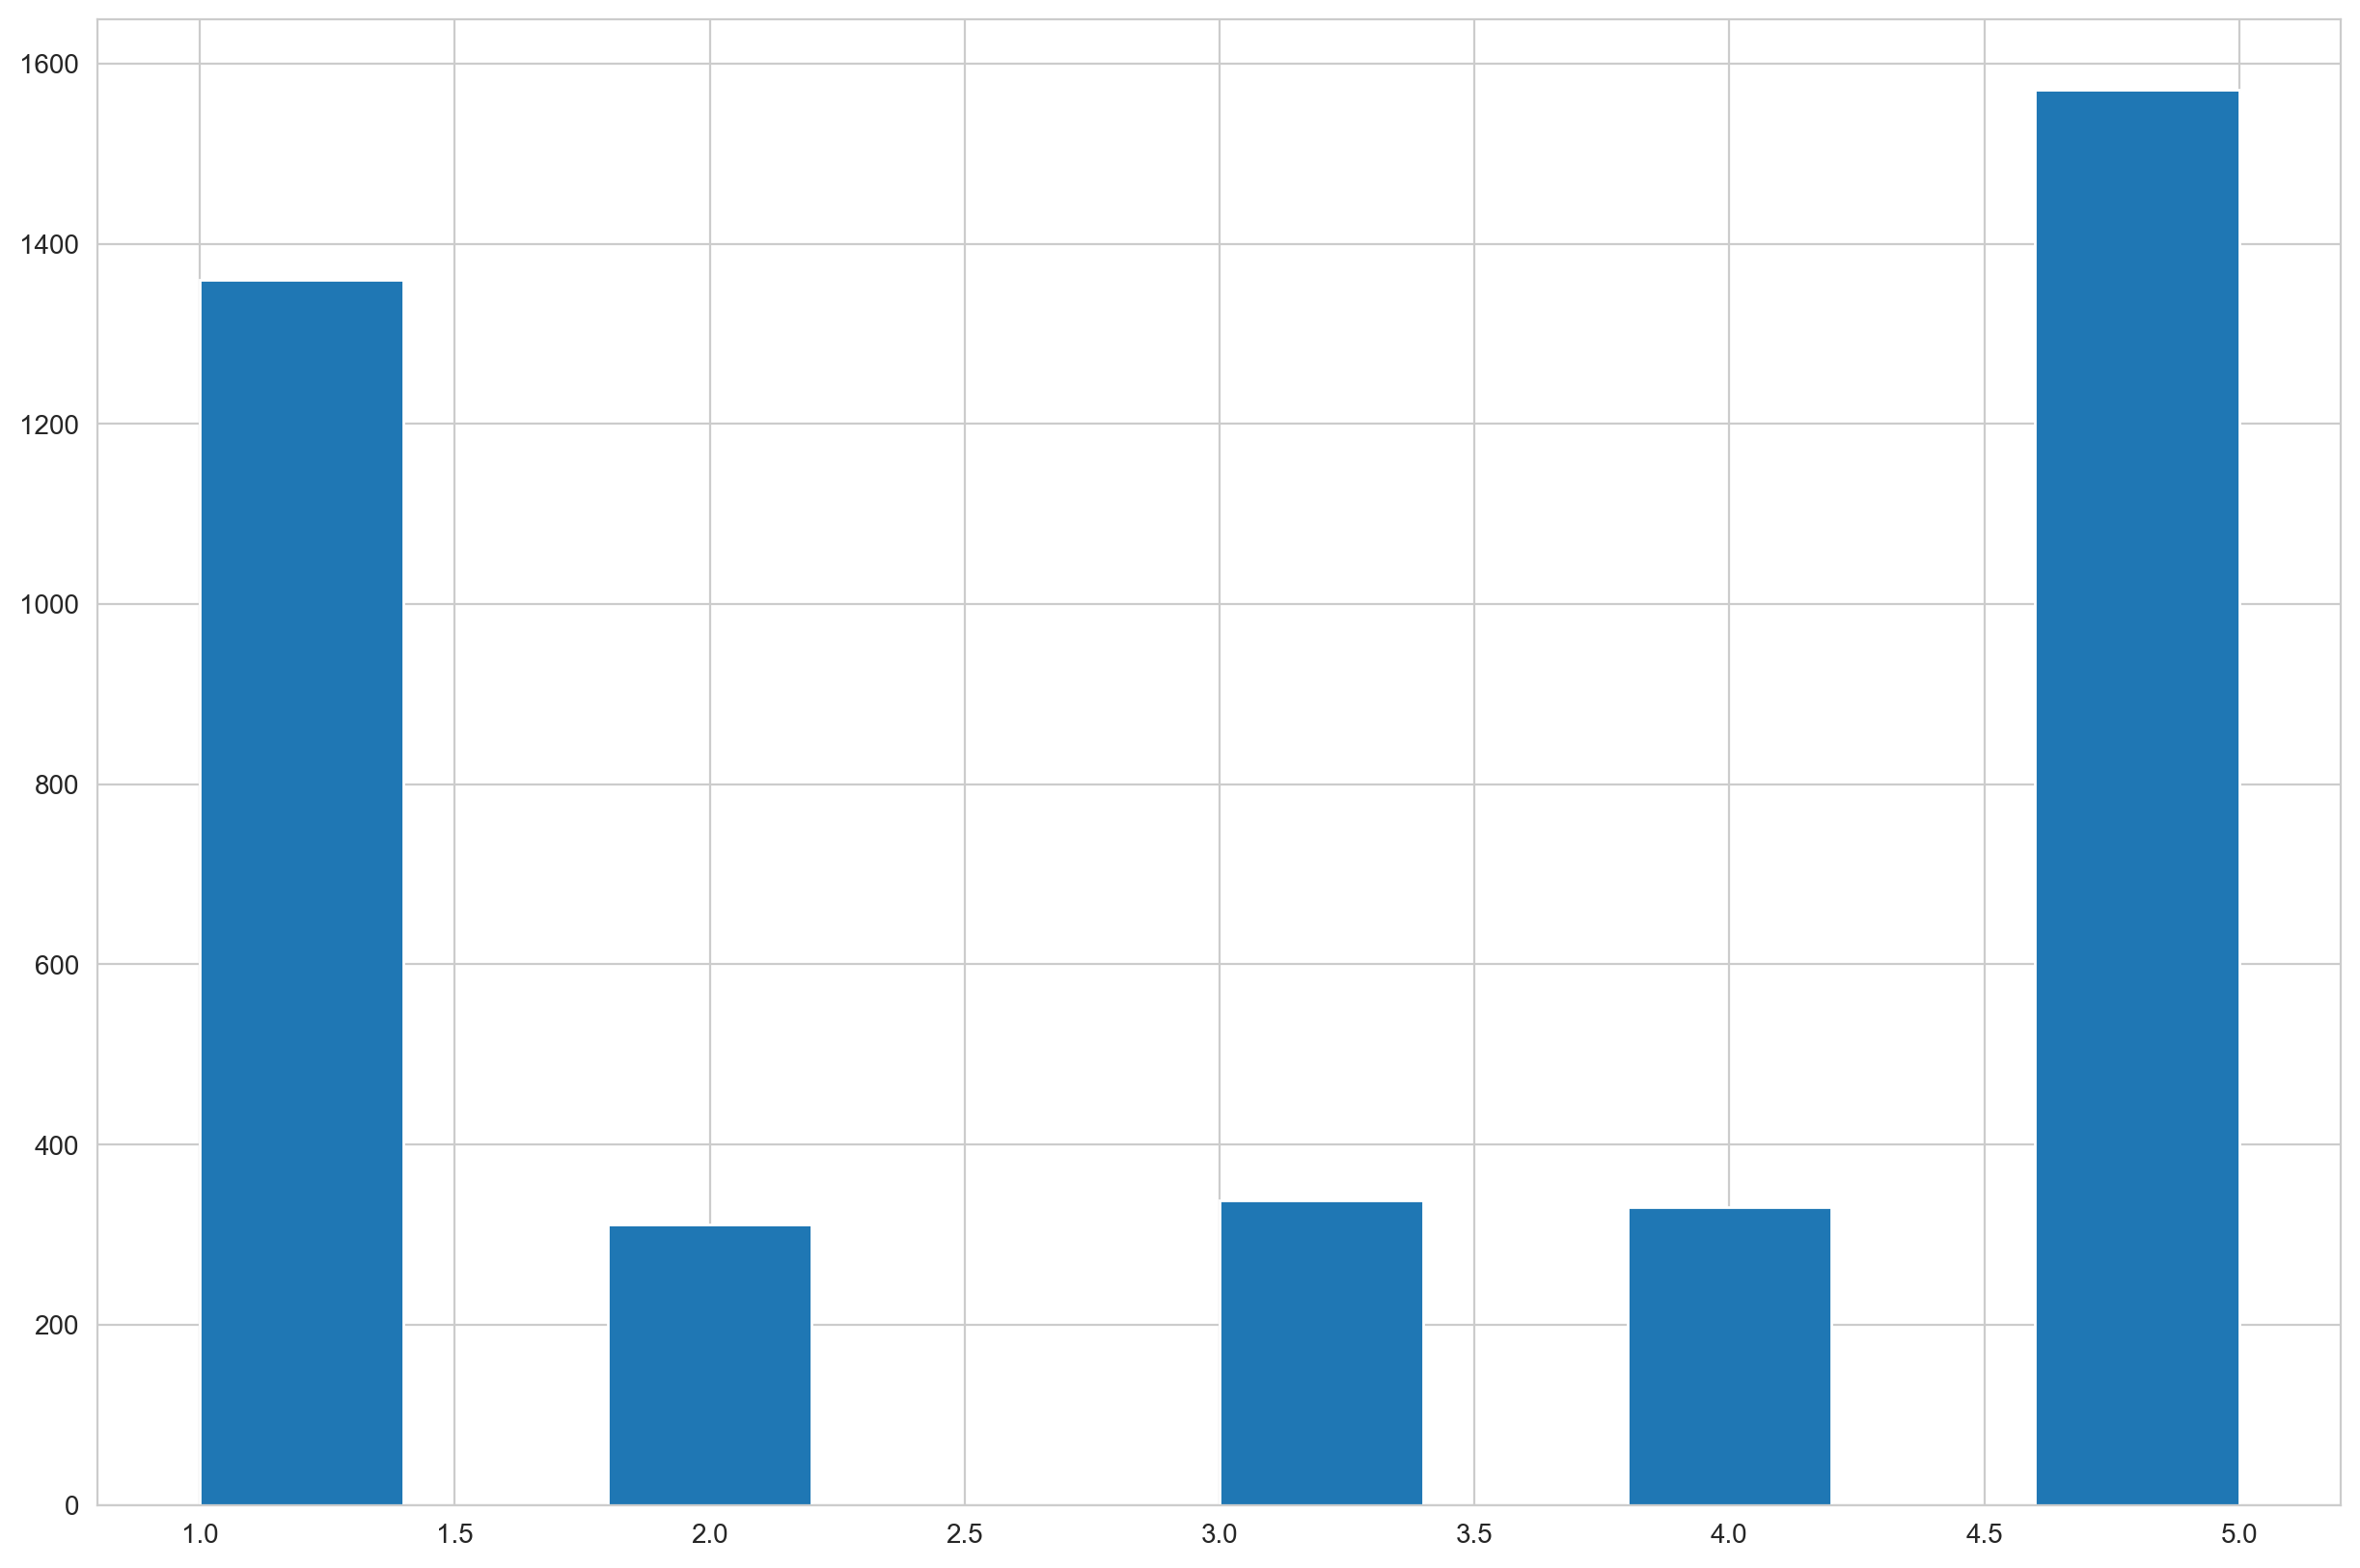

In [15]:
plt.hist(df_rosaliarev['score'])
plt.show()

In [17]:
!pip install emoji
!pip install wordcloud

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_rosaliarev['sentiment_polarity'] = df_rosaliarev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_rosaliarev['sentiment_subjective'] = df_rosaliarev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [19]:
df_rosaliarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Bersama ROSALIA INDAH NYAMAN AMAN dijalan,5,0.0,0.0
1,setelah update malah ga bisa dibuka semua agennya. parahhh.....,1,0.0,0.0
2,banyak bug,1,0.0,0.0
3,aplikasi kok eror gak di cek dlu kalo upload,2,0.0,0.0
4,bintang 4 karna belum bisa cetak e ticket dari app.,4,0.0,0.0
...,...,...,...,...
3905,Semakin mantab Perbisan di indonesia,5,0.0,0.0
3906,Nice. Sukses selalu Rosalia Indah.,5,0.6,1.0
3907,Ternyata lancar semua.register segala macam sangat lancar dan bagus..lanjutkan,4,0.0,0.0
3908,"Saya baut akun, udah ngisi profil lengkap. Tapi justru ngeblank.. Perbaikin nih aplikasi.",2,0.0,0.0


## Lowercasing

In [20]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_rosaliarev['content'] = df_rosaliarev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_rosaliarev['content'][188])
print(df_rosaliarev['content'][1])
print(df_rosaliarev['content'][400])

kereen
setelah update malah ga bisa dibuka semua agennya. parahhh.....
tidak mengirim OTP di email. website pun sepertinya tidak.bisa. terlalu menyulitkan calon penumpang.. uninstall saja


In [21]:
#Lowercase all reviews to see the difference
df_rosaliarev['content']= df_rosaliarev['content'].apply(lambda x: x.lower())
print(df_rosaliarev['content'][188])
print(df_rosaliarev['content'][1])
print(df_rosaliarev['content'][400])

kereen
setelah update malah ga bisa dibuka semua agennya. parahhh.....
tidak mengirim otp di email. website pun sepertinya tidak.bisa. terlalu menyulitkan calon penumpang.. uninstall saja


##Stopwords Removal
Indonesian Stopwords

In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wede\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [23]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_rosaliarev['wordCount'] = [len(review.split()) for review in df_rosaliarev['content']]
df_rosaliarev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_rosaliarev['content']]
df_rosaliarev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_rosaliarev['content']]

In [24]:
df_rosaliarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,bersama rosalia indah nyaman aman dijalan,5,0.0,0.0,6,0,0
1,setelah update malah ga bisa dibuka semua agennya. parahhh.....,1,0.0,0.0,9,0,6
2,banyak bug,1,0.0,0.0,2,0,0
3,aplikasi kok eror gak di cek dlu kalo upload,2,0.0,0.0,9,0,0
4,bintang 4 karna belum bisa cetak e ticket dari app.,4,0.0,0.0,10,0,1
...,...,...,...,...,...,...,...
3905,semakin mantab perbisan di indonesia,5,0.0,0.0,5,0,0
3906,nice. sukses selalu rosalia indah.,5,0.6,1.0,5,0,2
3907,ternyata lancar semua.register segala macam sangat lancar dan bagus..lanjutkan,4,0.0,0.0,9,0,3
3908,"saya baut akun, udah ngisi profil lengkap. tapi justru ngeblank.. perbaikin nih aplikasi.",2,0.0,0.0,13,0,5


In [25]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_rosaliarev['sentiment_rating'] = df_rosaliarev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [26]:
df_rosaliarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,bersama rosalia indah nyaman aman dijalan,5,0.0,0.0,Positive
1,setelah update malah ga bisa dibuka semua agennya. parahhh.....,1,0.0,0.0,Negative
2,banyak bug,1,0.0,0.0,Negative
3,aplikasi kok eror gak di cek dlu kalo upload,2,0.0,0.0,Negative
4,bintang 4 karna belum bisa cetak e ticket dari app.,4,0.0,0.0,Positive
...,...,...,...,...,...
3905,semakin mantab perbisan di indonesia,5,0.0,0.0,Positive
3906,nice. sukses selalu rosalia indah.,5,0.6,1.0,Positive
3907,ternyata lancar semua.register segala macam sangat lancar dan bagus..lanjutkan,4,0.0,0.0,Positive
3908,"saya baut akun, udah ngisi profil lengkap. tapi justru ngeblank.. perbaikin nih aplikasi.",2,0.0,0.0,Negative


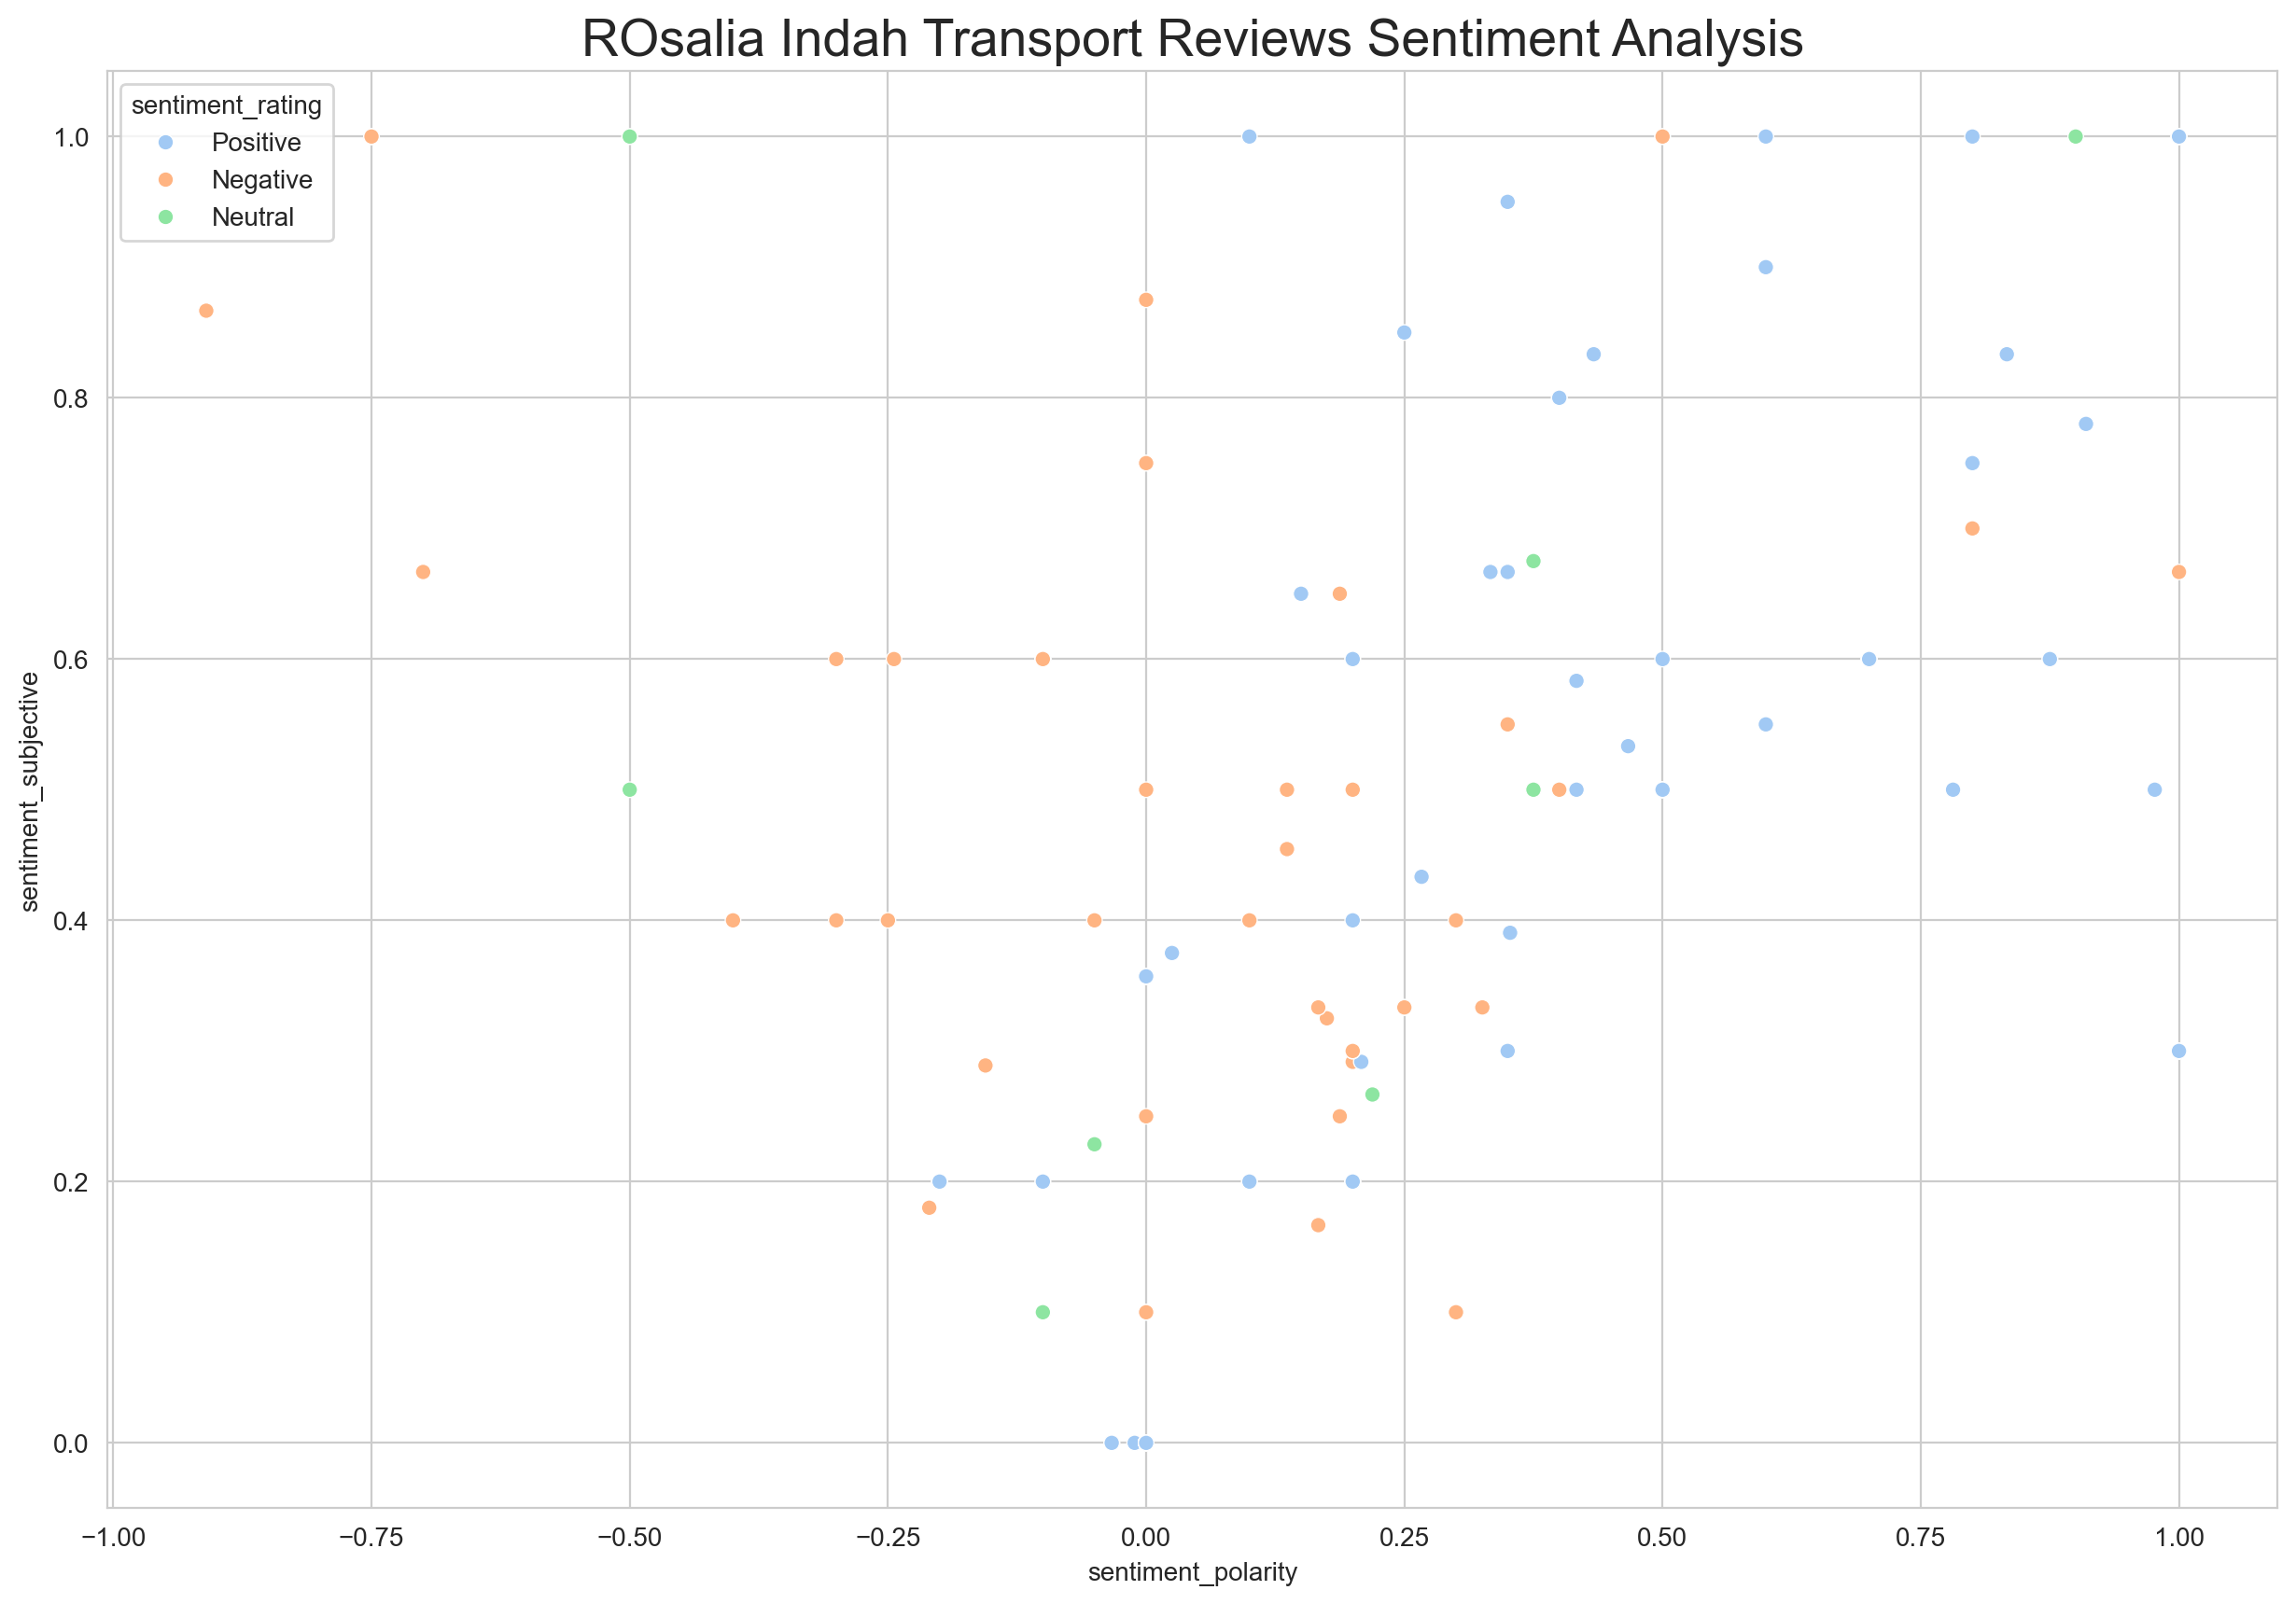

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_rosaliarev['sentiment_polarity'], y=df_rosaliarev['sentiment_subjective'],
                hue=df_rosaliarev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("ROsalia Indah Transport Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [29]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\Wede\AppData\Local\Temp\ipykernel_1820\2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


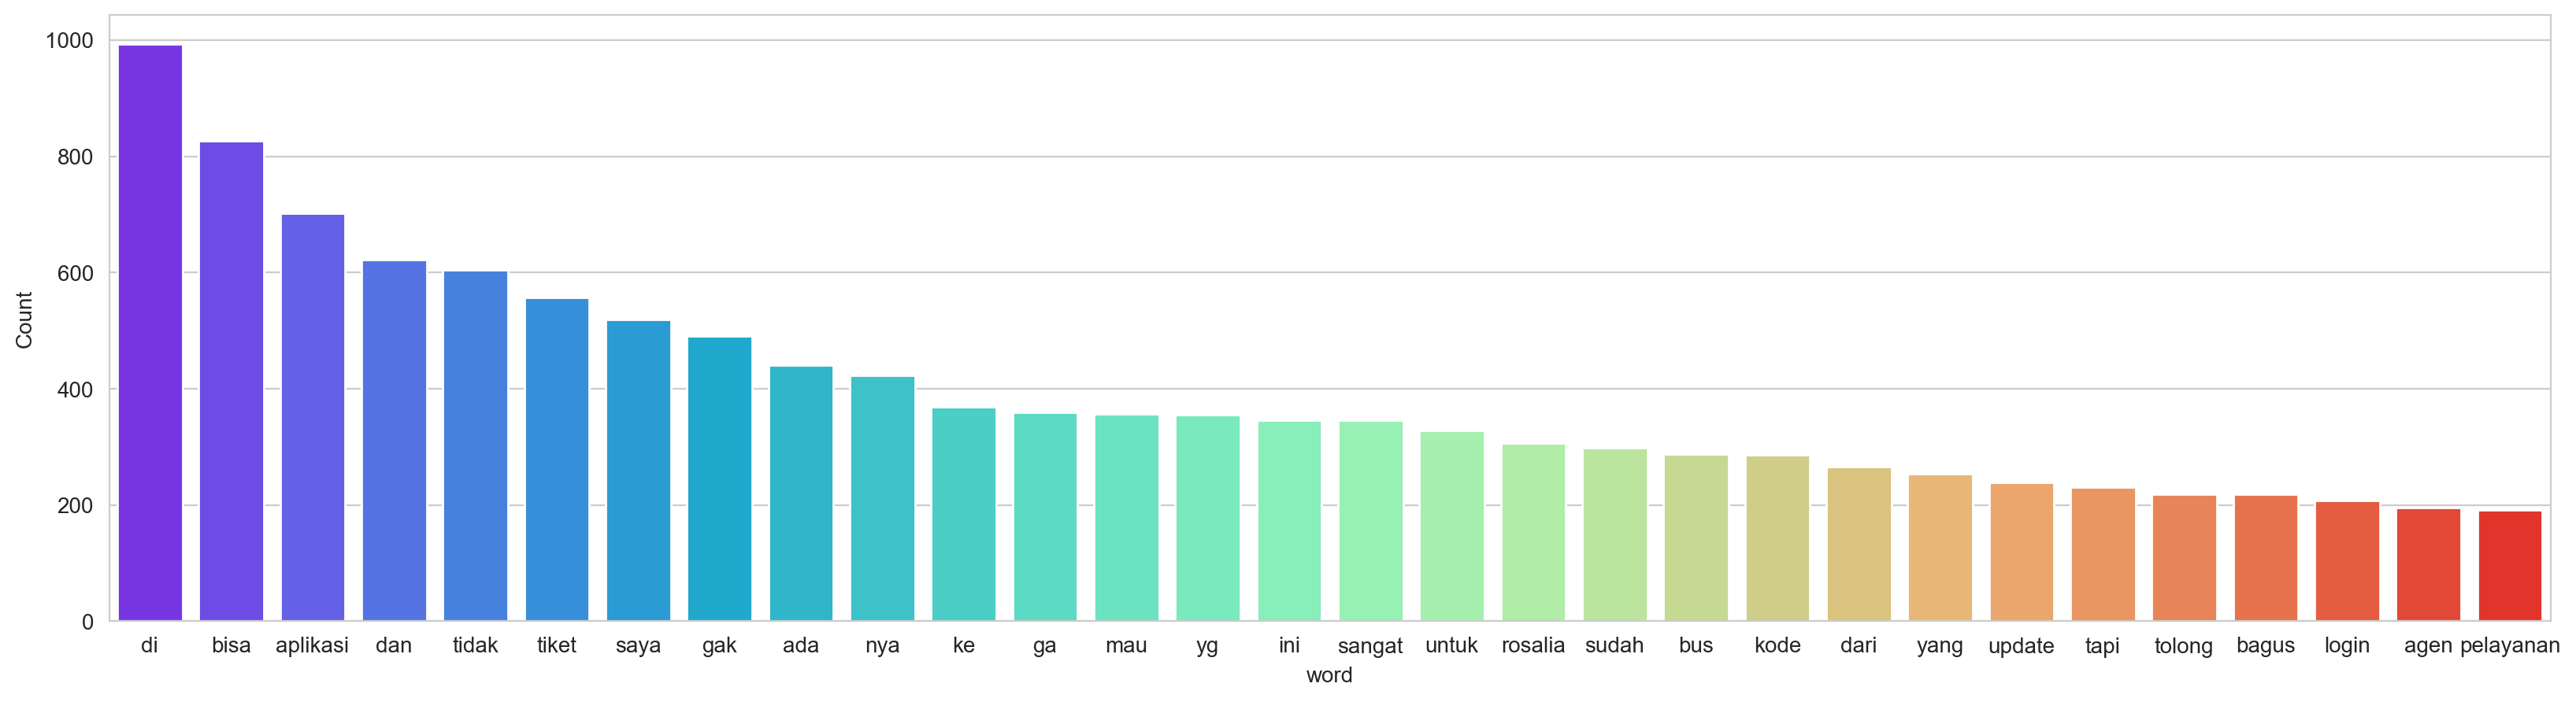

In [30]:
freq_words(df_rosaliarev['content'])

In [31]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_rosaliarev['content'] = df_rosaliarev['content'].apply(lambda x: stopword_remover.remove(x))


Defaulting to user installation because normal site-packages is not writeable


In [32]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_rosaliarev is your DataFrame and 'content' is the column
df_rosaliarev['content'] = df_rosaliarev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Wede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
df_rosaliarev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,rosalia indah nyaman aman dijalan,5,0.0,0.0,Positive
1,update ga dibuka agennya. parahhh.....,1,0.0,0.0,Negative
2,bug,1,0.0,0.0,Negative
3,aplikasi eror gak cek dlu kalo upload,2,0.0,0.0,Negative
4,bintang 4 karna cetak ticket app.,4,0.0,0.0,Positive
...,...,...,...,...,...
3905,mantab perbisan indonesia,5,0.0,0.0,Positive
3906,nice. sukses rosalia indah.,5,0.6,1.0,Positive
3907,lancar semua.register lancar bagus..lanjutkan,4,0.0,0.0,Positive
3908,"baut akun, udah ngisi profil lengkap. ngeblank.. perbaikin nih aplikasi.",2,0.0,0.0,Negative


In [35]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

C:\Users\Wede\AppData\Local\Temp\ipykernel_1820\2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


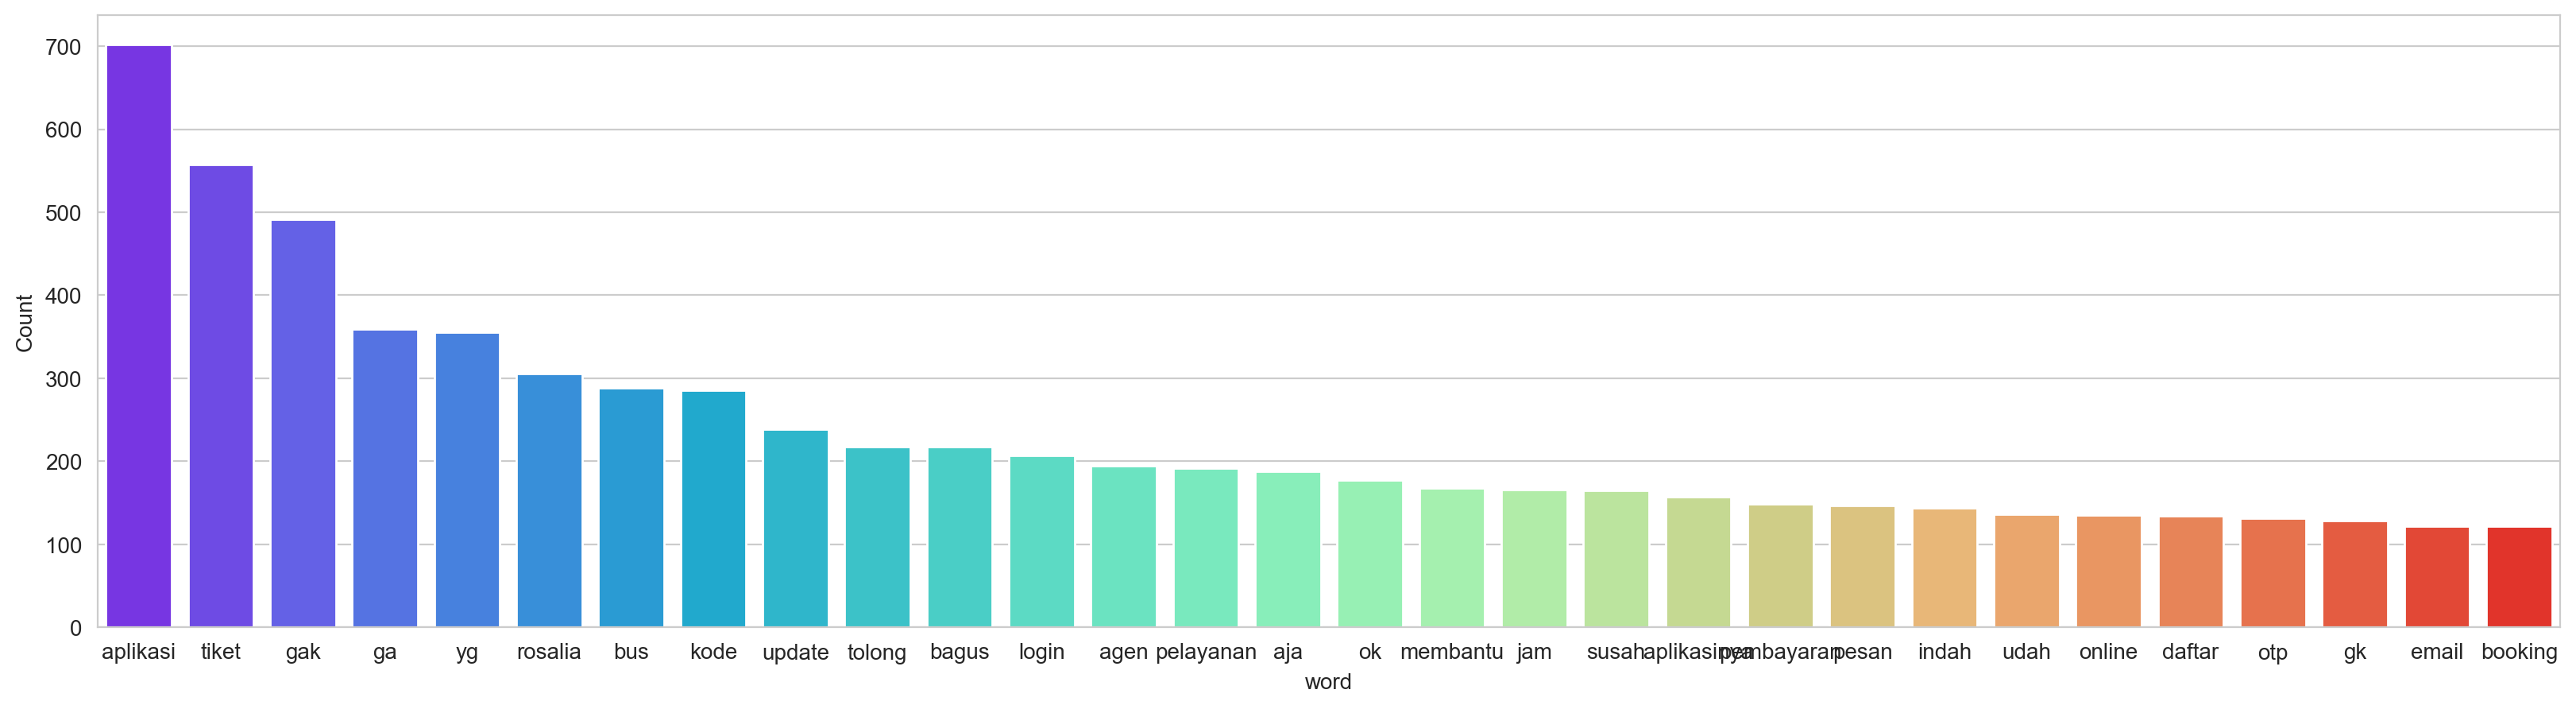

In [36]:
freq_words(df_rosaliarev['content'])

In [37]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_rosaliarev['wordCount'] = [len(review.split()) for review in df_rosaliarev['content']]
df_rosaliarev['wordCount_after_stopwords'] = [len(review.split()) for review in df_rosaliarev['content']]